<a href="https://colab.research.google.com/github/raj-esh7/UL-Second-Sem/blob/master/Etivity1_23264349.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student name: Cong Liu

# Student ID: 22030573

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Task 1
### Purpose:
To check your understanding of key terms used throughout this module.

## Answer

Provide your answer in this cell..

Let us assume that we have a dataset of balls, specifically ping pong balls and golf balls. We aim to use **perceptron** to classify them based on two features: circumference and weight.

So in the begining we have many ping pong balls and golf balls in the same time with two features 'circumference' and 'weight'. We then let those two features be the input space. So we have to train perceptron to learn final hypothesis with a set of different decision boundaries to best approximate the unknown target function that can perfectly distinguish between the two types of balls.
During the training, the perceptron automaticaly adjust its parameters to minimize the error measure which is the counts of the misclassified instances in the dataset. After training it will leads to a final hypothesis which can effectively seperates ping pong balls and golf balls according to the two features. And in the end, we have in-sample error and out-of-sample error. Specifically, the former represents how well the perceptron learned from the training data where latter represents how well this model generalizes to new and unseen data.

To showcase the results, the output space of the whole model is binary consisting of two types either ping pong ball or golf ball.
    



# Task 2
Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_errors = 1- train_scores
    test_errors = 1-test_scores

    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")


    plt.legend(loc="best")
    return plt

In [ ]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [ ]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

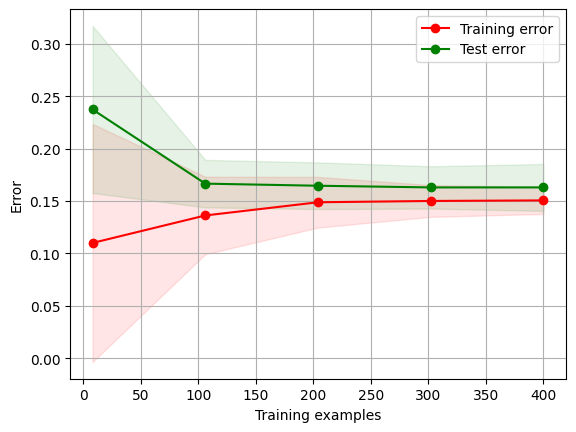

In [ ]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Neural net learning curves

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

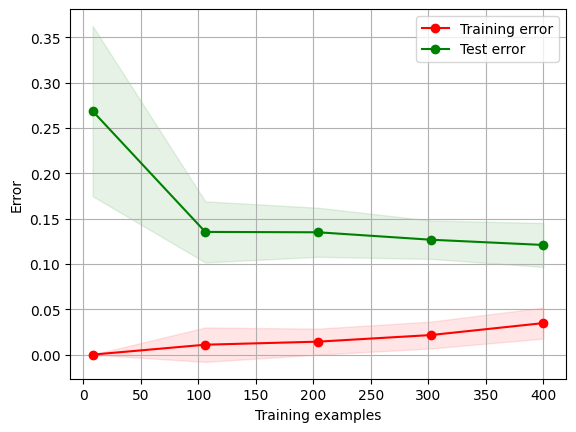

In [ ]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Describe and Explain
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

### Answer


Provide your answer in this cell..

First of all, here's my description of two learning curves:


1.   Logistic regression learning curve

     We have two different errors, Training Error and Test Error respectively. As we seen from the Training Error, it starts a bit lower than green line and increases gradually as soon as more data is added which means the model fits the initial data perfectly but hard to fit again once the complexity increases.

     On the other hand, Test Error decreases in the begining, then drop off really quick which means the more data added doesn't benifit the model.

2.   Neural net learning curves

     We have two different errors in this learning curves as well.

     So for the Training Error of this learning curves, it begins at a relatively high level and increases quickly as the number of data added, but again once its reached the number of training examples of 100, it's slow down significantly.

     On the other hand, Test Error begins at a high level but decreases really quick as more data added which means the model generalizing quite well.

Come back to the question of **'the differences in terms of what you currently understand about the relationship between  Ein  and  Eout  and the number of training samples, N'**

Here's my answer:

*   $E_{in}$ decreases as N increases
*   $E_{out}$ decreases as N increases as well, but only N increases to a specific point.
*   And the differences between $E_{in}$ and $E_{out}$ is that if a model is complex one, then it may cause overfitting, which means we then have a low $E_{in}$ and high $E_{out}$. And if we have a less complex model, then its totally reverse the situations.

And finally we have three questions below:

1.   Why the training error is (generally) lower than the test error

     I think the training error is generally lower than the test error beacause the model is fit to the data, it has adjust the parameters during the training to minimize error on it specifically.
     The test error measures how well the model performs on new and unseen data. Since the model hasn't been adjusted to this new data, the error is generally higher.

2.   Why the training error increases as the number of training samples is increased
     
     In terms of training samples increases, the model has seen more data and might cause more changes. And once it's happen, the model will become harder to fit all the data points perfectly.
     And the training error increases usually means that it tend to generalize instead of memorize.

3.   Which of the two models is the more complex model

     As far as I know, a complex model usually indicates those who have less training error. So in this way, based on the two graphs we have above, we can have this conclusion: the second graph is a more complex model compared with the first one. Since its training error starts higher and decreases more significantly as N increases, suggesting it's adjusting more to the data.



# Task 3

## Provided functions

Below functions implement linear regression in a closed form (one-step solution using the pseudo-inverse).

In [ ]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [ ]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a

### Answer

You may add as many cells below as you require.

In [ ]:
# Load the dataset
file_path = 'Et1_Task3a.csv'
data = pd.read_csv(file_path)
data.columns = ['X', 'y']

In [ ]:
data

,X,y
0,0.473684,0.650721
1,0.789474,0.784824
2,0.052632,0.442512
3,0.315789,0.444663
4,0.947368,0.790664
5,0.631579,0.592090
6,0.000000,0.391561
7,0.421053,0.623372
8,0.578947,0.701182
9,0.684211,0.660630


In [ ]:
# Calculate mean Squared Error
def calc_error(w,X,y):
    # implement your error function for linear regression here
    y_pred = linreg_predict(w, X)
    return ((y - y_pred) ** 2).mean()


In [ ]:
# Two provided functions
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [ ]:
# Processing the data
X = data['X'].values.reshape(-1, 1)
y = data['y'].values

In [ ]:
# Calculating weights
weights = linreg_weights(X, y)

# Prediction and error calculation
y_pred = linreg_predict(weights, X)
error = calc_error(weights, X, y)

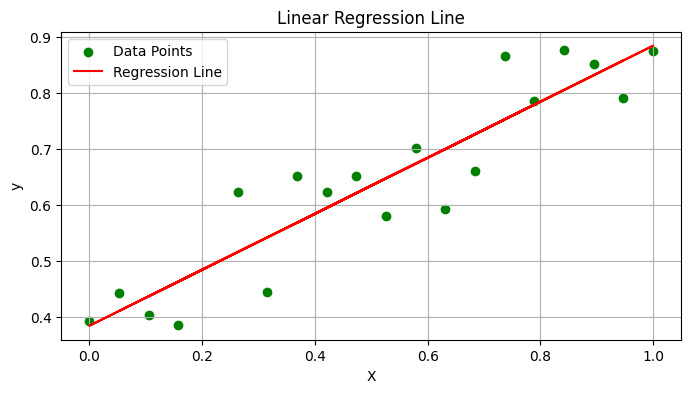

In [ ]:
# Plotting the regression line together with the data
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='green', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Quantify the error
print("Error without outlier:", error)

Error without outlier: 0.004317054763326226


##  Describe and Explain
Discuss your results and answer the following questions:
1. Which data point adds the biggest error term to the optimised error function?
2. How does the error contributed by this point relate to its distance from the regression line/function?
3. How do outliers effect linear regression and why?
4. Under what circumstances will linear regression with a squared error measure be a good model?

Provide your answer in this cell..

1. Which data point adds the biggest error term to the optimised error function?

  I was implemented MSE in the task 3a to calculate the error, so in this case, the answer of this question is that the data point is most far away from the regression line. Because in the context of the Mean Square Error, the error contributed by each point is the square of its vertical distance from the regression line. Therefore, the further the points are, the biggest error it will cause.

2. How does the error contributed by this point relate to its distance from the regression line/function?

  So I've already gave the answer above, a small vertical distance leads to a small error term, while a larger distance results in a significantly larger error term due to the squaring effect.

3. How do outliers effect linear regression and why?

  

4. Under what circumstances will linear regression with a squared error measure be a good model?




# Task 3b

For regression the Mean Squared Error measure is a useful error measure. In this task we will explore how useful mean squared error is for classification. To this end:

- Use the provided code to classify the provided data using the linear classification algorithm
- Note that linear classification is implemented by putting the output of the linear regression model through the sign function

### Answer

In [ ]:
def calc_class_error(w,X,y):
    # implement your error function for linear classification here
    pass

SyntaxError: incomplete input (<ipython-input-28-8689aa3113e9>, line 2)

In [ ]:
def linclass_predict(w,X):
    # implement your linear classification algorithm here
    pass

You may add as many cells below as you require.

##  Describe and Explain
Describe the impact of the outlier on both models. Explain why logistic regression is less sensitive to the outlier.

Provide your answer in this cell..

 # Reflection
 Once you have completed all tasks in this notebook and have studied all other materials for this E-tivity (resources, lectures and live sessions), answer the following questions.
<ol>
<li>Summarise your understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. Also discuss how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.</li>
<li>Summarise your understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data. </li>
    </ol>

## 1
Provide your answer in this cell..

## 2
Provide your answer in this cell..

<hr style="border:2px solid gray">

# Appendix

## Demonstration of effect of outlier on logistic regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [ ]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

Extract weights from model:

In [ ]:
w_lr = estimator.intercept_
w_lr=np.append(w_lr, estimator.coef_)
w_lr

Add outlier:

In [ ]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

Extract new weight vector from model:

In [ ]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

In [ ]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr[0]/w_lr[2]+w_lr[1]/w_lr[2]*2,-w_lr[0]/w_lr[2]-w_lr[1]/w_lr[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)